In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

1.	Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [20]:
data = pd.read_csv('Housing.csv', delimiter=',')

Виведіть перші 5 рядків.

In [21]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2.	Зробіть новий датасет, який містить тільки ці стовпчики.
columns = ['price', 'area', 'bedrooms', 'bathrooms']


In [22]:
columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_data = data.loc[:, columns]
new_data.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


3.	Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.


In [23]:
new_data.dtypes

price        int64
area         int64
bedrooms     int64
bathrooms    int64
dtype: object

In [24]:
new_data = new_data.astype({'price': float, 'area': float, 'bedrooms': float, 'bathrooms': float})

In [25]:
new_data.dtypes

price        float64
area         float64
bedrooms     float64
bathrooms    float64
dtype: object

In [26]:
new_data_pass = new_data.isna().sum()
new_data_pass

price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

4.	Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1.

In [27]:
new_data.head()

,price,area,bedrooms,bathrooms
0,13300000.0,7420.0,4.0,2.0
1,12250000.0,8960.0,4.0,4.0
2,12250000.0,9960.0,3.0,2.0
3,12215000.0,7500.0,4.0,2.0
4,11410000.0,7420.0,4.0,1.0


In [28]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(new_data)
normalized_data = pd.DataFrame(normalized_data, columns=columns)
normalized_data.head()

,price,area,bedrooms,bathrooms
0,4.566365,1.046726,1.403419,1.421812
1,4.004484,1.757010,1.403419,5.405809
2,4.004484,2.218232,0.047278,1.421812
3,3.985755,1.083624,1.403419,1.421812
4,3.554979,1.046726,1.403419,-0.570187


5.	Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

In [29]:
X = normalized_data.drop(columns=['price'])
y = normalized_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 3), (109, 3), (436,), (109,))

6.	Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

7.	Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8.	Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2).
Потім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією).



In [31]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (RMSE):", rmse)
print("Коефіцієнт детермінації (R^2):", r2)

Середньоквадратична помилка (RMSE): 0.6566700672125361
Коефіцієнт детермінації (R^2): 0.47740787592677625


In [32]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
mean_rmse = rmse_scores.mean()
mean_rmse

0.7387795240253431

9.	Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

In [33]:
y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({'Прогнозовані ціни': y_pred})
predictions_df.head()

,Прогнозовані ціни
0,-0.437379
1,0.739718
2,-0.296529
3,1.235589
4,-0.254639


Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [34]:
X_train_df = np.column_stack((np.ones(X_train.shape[0]), X_train))

beta = np.linalg.inv(X_train_df.T @ X_train_df) @ X_train_df.T @ y_train
print("Аналітичні коефіцієнти регресії:")
beta[0], beta[1], beta[2], beta[3]

Аналітичні коефіцієнти регресії:


(0.0115261815474995,
 0.4541141811644547,
 0.18726083332992383,
 0.3801914349893909)

9.	Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.

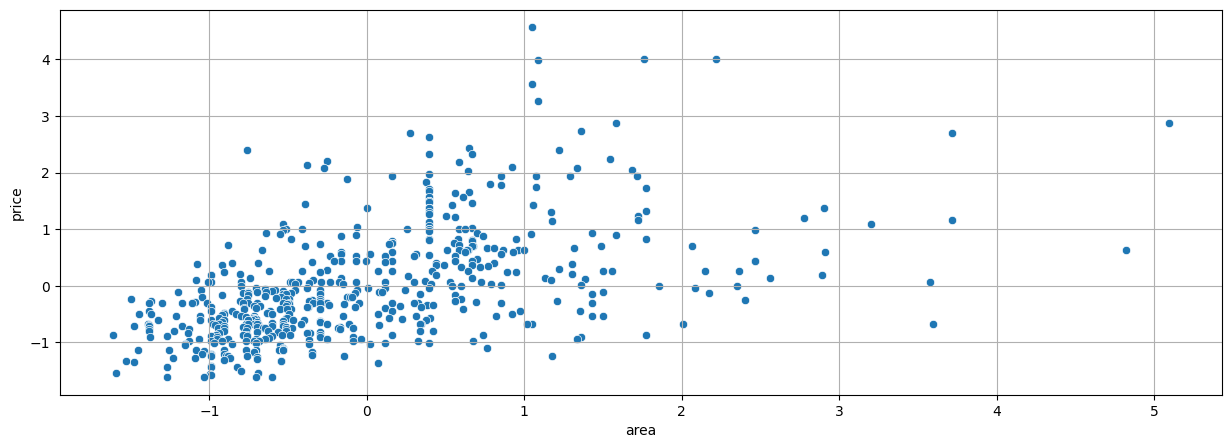

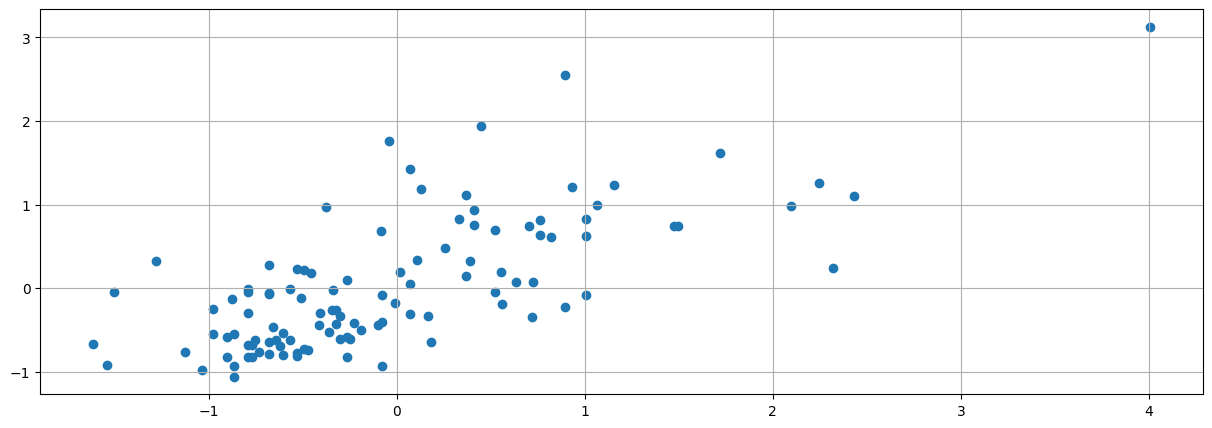

In [35]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='area', y='price', data=normalized_data)
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred)
plt.grid(True)
plt.show()

10.	Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

In [36]:
print("Аналітичні результати:")
print(beta[0])
print(beta[1])
print(beta[2])
print(beta[3])

print("\nОтримані параметри лінійної регресії:")
print(model.intercept_)
print(model.coef_[1])
print(model.coef_[2])
print(model.coef_[3])

Аналітичні результати:
0.0115261815474995
0.4541141811644547
0.18726083332992383
0.3801914349893909

Отримані параметри лінійної регресії:
0.011526181547499513
0.1872608333299245
0.38019143498939034


IndexError: index 3 is out of bounds for axis 0 with size 3

11.	Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням.

Лінійна регресія - це потужний інструмент для прогнозування цін на будинок на основі певних атрибутів.

Данна практична робота була пов'язана з лінійною регрессією. Була використана бібліотека "scikit-learn", за допомогою якої створювали модель лінійної регрессії, розподіляли данні та оцінювали якість можелі. Також в практичній була використана крос-валідація та побудова графіку.